In [35]:
import pandas as pd

df = pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060980,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063158,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064247,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062613,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061524,47894400
...,...,...,...,...,...,...,...
9190,2022-08-29,265.850006,267.399994,263.850006,265.230011,265.230011,20338500
9191,2022-08-30,266.670013,267.049988,260.660004,262.970001,262.970001,22767100
9192,2022-08-31,265.390015,267.109985,261.329987,261.470001,261.470001,24791800
9193,2022-09-01,258.869995,260.890015,255.410004,260.399994,260.399994,23263400


In [36]:
df = df[['Date', 'Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9190,2022-08-29,265.230011
9191,2022-08-30,262.970001
9192,2022-08-31,261.470001
9193,2022-09-01,260.399994


In [37]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9190    2022-08-29
9191    2022-08-30
9192    2022-08-31
9193    2022-09-01
9194    2022-09-02
Name: Date, Length: 9195, dtype: object

In [38]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year = year, month = month, day = day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [39]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\eliu0\AppData\Local\Temp/ipykernel_41408/2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9190   2022-08-29
9191   2022-08-30
9192   2022-08-31
9193   2022-09-01
9194   2022-09-02
Name: Date, Length: 9195, dtype: datetime64[ns]

In [40]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2022-08-29,265.230011
2022-08-30,262.970001
2022-08-31,261.470001


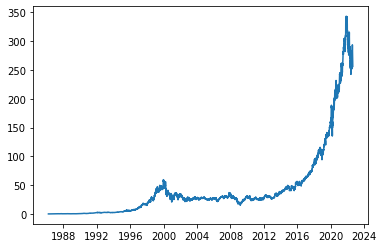

In [41]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [44]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df, 
                                '1986-03-18', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,1986-03-18,0.097222,0.100694,0.102431,0.099826
1,1986-03-19,0.100694,0.102431,0.099826,0.098090
2,1986-03-20,0.102431,0.099826,0.098090,0.095486
3,1986-03-21,0.099826,0.098090,0.095486,0.092882
4,1986-03-24,0.098090,0.095486,0.092882,0.090278
...,...,...,...,...,...
9074,2022-03-17,276.440002,287.149994,294.390015,295.220001
9075,2022-03-18,287.149994,294.390015,295.220001,300.429993
9076,2022-03-21,294.390015,295.220001,300.429993,299.160004
9077,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [45]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    
    dates = df_as_np[:, 0]
    
    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    
    Y = df_as_np[:, -1]
    
    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((9079,), (9079, 3, 1), (9079,))

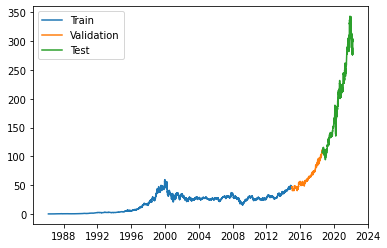

In [46]:
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.legend(['Train', 'Validation', 'Test'])

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(1)])

model.compile(loss = 'mse',
              optimizer = Adam(learning_rate = 0.001),
              metrics = ['mean_absolute_error'])

model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 100)

Epoch 1/100
227/227 [==============================] - 3s 6ms/step - loss: 125.9317 - mean_absolute_error: 5.3463 - val_loss: 583.2389 - val_mean_absolute_error: 17.0430
Epoch 2/100
227/227 [==============================] - 1s 3ms/step - loss: 0.4391 - mean_absolute_error: 0.3438 - val_loss: 441.9854 - val_mean_absolute_error: 13.7399
Epoch 3/100
227/227 [==============================] - 1s 4ms/step - loss: 0.3587 - mean_absolute_error: 0.3393 - val_loss: 384.6114 - val_mean_absolute_error: 12.4123
Epoch 4/100
227/227 [==============================] - 1s 5ms/step - loss: 0.3282 - mean_absolute_error: 0.3302 - val_loss: 358.7677 - val_mean_absolute_error: 12.2602
Epoch 5/100
227/227 [==============================] - 1s 3ms/step - loss: 0.3120 - mean_absolute_error: 0.3224 - val_loss: 335.4405 - val_mean_absolute_error: 11.1518
Epoch 6/100
227/227 [==============================] - 1s 3ms/step - loss: 0.3062 - mean_absolute_error: 0.3207 - val_loss: 319.7450 - val_mean_absolute_error

Epoch 50/100
227/227 [==============================] - 1s 4ms/step - loss: 0.2913 - mean_absolute_error: 0.3176 - val_loss: 276.4307 - val_mean_absolute_error: 10.2989
Epoch 51/100
227/227 [==============================] - 1s 3ms/step - loss: 0.2978 - mean_absolute_error: 0.3201 - val_loss: 256.2211 - val_mean_absolute_error: 9.2266
Epoch 52/100
227/227 [==============================] - 1s 3ms/step - loss: 0.3014 - mean_absolute_error: 0.3223 - val_loss: 261.7393 - val_mean_absolute_error: 9.5853
Epoch 53/100
227/227 [==============================] - 1s 4ms/step - loss: 0.2839 - mean_absolute_error: 0.3041 - val_loss: 245.1744 - val_mean_absolute_error: 9.0471
Epoch 54/100
227/227 [==============================] - 1s 3ms/step - loss: 0.2785 - mean_absolute_error: 0.3092 - val_loss: 240.7563 - val_mean_absolute_error: 8.9732
Epoch 55/100
227/227 [==============================] - 1s 4ms/step - loss: 0.2961 - mean_absolute_error: 0.3236 - val_loss: 245.4789 - val_mean_absolute_error

Epoch 99/100
227/227 [==============================] - 1s 6ms/step - loss: 0.2920 - mean_absolute_error: 0.3148 - val_loss: 247.6758 - val_mean_absolute_error: 9.3211
Epoch 100/100
227/227 [==============================] - 1s 4ms/step - loss: 0.3014 - mean_absolute_error: 0.3201 - val_loss: 225.5220 - val_mean_absolute_error: 8.4912


227/227 [==============================] - 1s 2ms/step


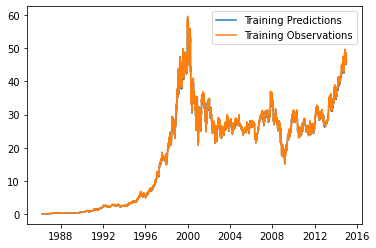

In [50]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

29/29 [==============================] - 0s 2ms/step


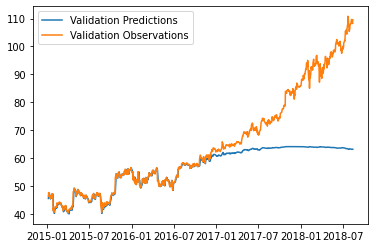

In [51]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

29/29 [==============================] - 0s 2ms/step


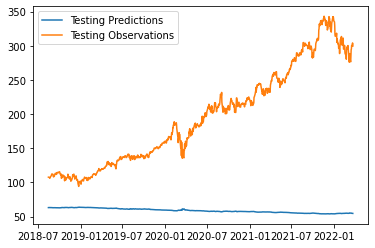

In [52]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

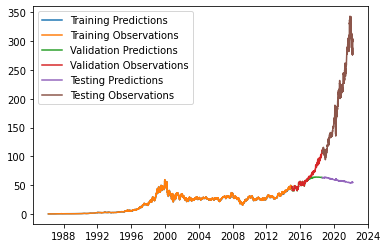

In [53]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])